## Preparation


In [50]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [47]:
import os
path = "/content/drive/MyDrive/ColabNotebooks/DD2360/hw4"
os.chdir(path)
!ls

a.out		       ex_2_streamed	      ex_2_streamed.cu
ex_2		       ex_2_streamed16.nvvp   ex_2_streamed.nvvp
ex_2_nonstreamed       ex_2_streamed1.nvvp    stream_per-thread
ex_2_nonstreamed.cu    ex_2_streamed256.nvvp
ex_2_nonstreamed.nvvp  ex_2_streamed4.nvvp


## Compilation


In [93]:
!nvcc -arch=sm_75 ex_2_nonstreamed.cu -o ex_2_nonstreamed

In [96]:
!nvcc -arch=sm_75 ex_2_streamed.cu -o ex_2_streamed

## Q1

In [97]:
!bash ./run.sh | grep Time > ex_2_1

In [ ]:
!grep -o '[0-9]*\.[0-9]\+' ex_2_1 | tee ex_2_1new

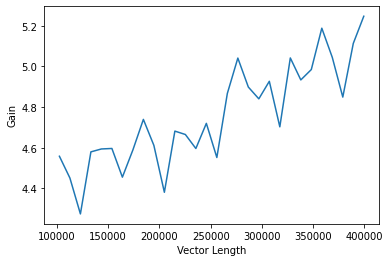

In [119]:
import matplotlib.pyplot as plt
with open("ex_2_1new.txt", "r") as f: 
  lines = f.readlines()
  data = [float(line.strip()) for line in lines]

gain = []
for i in range(0,30):
  gain.append(data[i] / data[i + 31])
#print(gain)

x = []
for i in range(102400, 409600, 10240):
  x.append(i)

plt.plot(x, gain)
plt.xlabel('Vector Length')
plt.ylabel('Gain')

plt.show()

## Q2

In [120]:
!/usr/local/cuda-11/bin/nvprof --profile-from-start off --output-profile ex_2_streamed4b.nvvp -f ./ex_2_streamed 204800 4

The input length is 204800
The number of streams is 4
==98501== NVPROF is profiling process 98501, command: ./ex_2_streamed 204800 4
Time2: 2.015261
==98501== Generated result file: /content/drive/MyDrive/ColabNotebooks/DD2360/hw4/ex_2_streamed4b.nvvp


## Q3

In [121]:
!bash ./run3.sh | grep Time > ex_2_3

In [ ]:
!grep -o '[0-9]*\.[0-9]\+' ex_2_3 | tee ex_2_3new

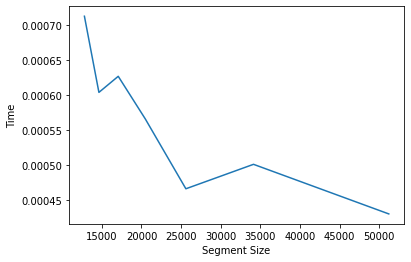

In [127]:
import matplotlib.pyplot as plt
with open("ex_2_3new.txt", "r") as f: 
  lines = f.readlines()
  data = [float(line.strip()) for line in lines]

x = []
y = []
for i in range(0,7):
  x.append(204800/(4+2*i))
  y.append(data[i])

plt.plot(x, y)
plt.xlabel('Segment Size')
plt.ylabel('Time')

plt.show()